<a href="https://colab.research.google.com/github/Angel-Arroyo-H/alura-data-science-challenge-3/blob/main/Alura_DataScience_Challenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extração de dados
Faremos a extração diretamente do repositorio do projeto.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Angel-Arroyo-H/alura-data-science-challenge-3/refs/heads/main/dados/dados_tratados.csv'
dados = pd.read_csv(url)

# Customização de funções

##Funções Graficas

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Função para dar titulo aos gráficos
def titulo(variavel:str):
  titulos = {
      'churn': 'Cliente cancelou o contrato?'
      ,'cliente_idoso': 'O cliente tem mais de 65 anos?'
      ,'cliente_tem_parceiro': 'O cliente tem parceiro ou parceira?'
      ,'cliente_tem_dependentes': 'O cliente tem dependentes?'
      ,'servico_telefonico': 'O cliente contratou serviço telefônico?'
      ,'multiplas_linhas': 'O cliente contratou serviço de Multiplas Linhas?'
      ,'assinatura_internet': 'O cliente tem Assinatura de Internet?'
      ,'seguranca_online': 'O cliente contratou serviço de Seguranca Online?'
      ,'backup_online': 'O cliente contratou serviço de Backup Online?'
      ,'protecao_dispositivo': 'O cliente contratou serviço de Protecao de Dispositivo?'
      ,'suporte_tecnico': 'O cliente contratou serviço de Suporte Técnico?'
      ,'tv_a_cabo': 'O cliente contratou serviço de TV a Cabo?'
      ,'streaming_filmes': 'O cliente contratou serviço de Streaming de Filmes?'
      ,'contrato': 'Qual o tipo de contrato do cliente?'
      ,'fatura_online': 'O cliente contratou serviço de Fatura Online?'
      ,'forma_pagamento': 'Qual a forma de pagamento do cliente?'
      ,'cliente_masculino': 'O cliente é do sexo masculino?'
      ,'meses_contrato': 'Boxplot: Quantidade de meses de contrato'
      ,'faturamento_mensal': 'Boxplot: Faturamento mensal por cliente'
      ,'faturamento_total': 'Boxplot: Faturamento total por cliente'
      ,'contas_diarias': 'Boxplot: Faturamento diário por cliente'
  }
  return titulos[variavel]

# Funções para customizar os gráficos.
def plot_rosca(df,variavel):
  # Calcular a proporção de usuários que deram churn
  proporcao = df.value_counts(variavel,normalize=True,dropna=False)

  # Configurações do gráfico de rosca
  fig, ax = plt.subplots(figsize=(4, 4), facecolor='white')
  ax.set_facecolor(sns.color_palette("rocket")[5])

  # Plotar o gráfico de rosca
  cores = sns.color_palette("rocket")[1:] # [sns.color_palette("rocket")[1], sns.color_palette("rocket")[4]]
  wedges, texts, autotexts = ax.pie(
      proporcao
      ,labels=[str(c).replace('True','Sim').replace('False','Não') for c in proporcao.index]
      ,autopct='%1.1f%%'
      ,startangle=180
      ,wedgeprops=dict(width=0.4, edgecolor=None)
      ,pctdistance=0.8
      ,colors=cores
  )
  # Adicionar rótulos e título
  plt.title(titulo(variavel), fontsize=13, family='sans-serif', color='#2a3f5f')

  # Configurar rótulos e porcentagens com as cores especificadas
  for text, autotext, color in zip(texts, autotexts, cores):
      text.set_color(color)
      text.set_fontsize(10)
      autotext.set_color('white')
      autotext.set_fontsize(10)

  return fig

# Gráfico de correlacao
def plot_correlacao(correlacao, figsize=(10, 8)):
  mascara = np.zeros_like(correlacao, dtype=bool)
  mascara[np.triu_indices_from(mascara)] = True

  # Configurar a figura do matplotlib
  f, ax = plt.subplots(figsize=figsize)

  # Gerar o mapa de calor (heatmap)
  cmap = sns.diverging_palette(15, 280, s=80, as_cmap=True) # 340
  #cmap = sns.color_palette("coolwarm_r", as_cmap=True)

  sns.heatmap(correlacao, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
              square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

  # Exibir o mapa de calor (heatmap)
  return plt

# Função para transformar cores no formato sns.color_palette para hex
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]*255),int(rgb[1]*255),int(rgb[2]*255))

# Função para dar titulo aos gráficos
def titulo(variavel:str):
  titulos = {
      'churn': 'Cliente cancelou contrato?'
      ,'cliente_idoso': 'O cliente tem mais de 65 anos?'
      ,'cliente_tem_parceiro': 'O cliente tem parceiro ou parceira?'
      ,'cliente_tem_dependentes': 'O cliente tem dependentes?'
      ,'servico_telefonico': 'O cliente contratou serviço telefônico?'
      ,'multiplas_linhas': 'O cliente contratou serviço de Multiplas Linhas?'
      ,'assinatura_internet': 'O cliente tem Assinatura de Internet?'
      ,'seguranca_online': 'O cliente contratou serviço de Seguranca Online?'
      ,'backup_online': 'O cliente contratou serviço de Backup Online?'
      ,'protecao_dispositivo': 'O cliente contratou serviço de Protecao de Dispositivo?'
      ,'suporte_tecnico': 'O cliente contratou serviço de Suporte Técnico?'
      ,'tv_a_cabo': 'O cliente contratou serviço de TV a Cabo?'
      ,'streaming_filmes': 'O cliente contratou serviço de Streaming de Filmes?'
      ,'contrato': 'Qual o tipo de contrato do cliente?'
      ,'fatura_online': 'O cliente contratou serviço de Fatura Online?'
      ,'forma_pagamento': 'Qual a forma de pagamento do cliente?'
      ,'cliente_masculino': 'O cliente é do sexo masculino?'
      ,'meses_contrato': 'Boxplot: Quantidade de meses de contrato'
      ,'faturamento_mensal': 'Boxplot: Faturamento mensal por cliente'
      ,'faturamento_total': 'Boxplot: Faturamento total por cliente'
      ,'contas_diarias': 'Boxplot: Faturamento diário por cliente'
  }
  return titulos[variavel]

def plot_churn_por_variavel(df,variavel:str):
  is_numeric = False if df.dtypes.loc[variavel] in ['bool','object'] else True
  parametros_comuns = {
      'width':600
      ,'height':400
      ,'color_discrete_map':{
          'Sim': rgb_to_hex(sns.color_palette("rocket")[4])
          ,'Não': rgb_to_hex(sns.color_palette("rocket")[1])
      }
      ,'template':'plotly_white'
      ,'title':titulo(variavel)
  }
  if is_numeric:
    fig = px.box(
        df
        ,x=df[variavel].replace({True:'Sim',False:'Não'})#variavel
        ,color=df['churn'].map({True:'Sim',False:'Não'})
        ,labels={variavel:'','churn':'Churn','y':''}
        ,**parametros_comuns
    )
    fig.update_layout(legend_traceorder='reversed')
  else:
    fig = px.histogram(
        df
        ,y=df[variavel].replace({True:'Sim',False:'Não'})#variavel
        ,text_auto=True
        ,barmode='group'
        ,barnorm='percent'
        ,color=df['churn'].map({True:'Sim',False:'Não'})
        ,labels={variavel:'','churn':'Churn','y':''}
        ,**parametros_comuns
    )
    fig.update_traces(texttemplate='%{x:.1f}%', textposition='outside')
    fig.update_xaxes(
        showticklabels=False
        ,ticks=''
        ,showgrid=False
        ,range=[0, 100]
    )
    fig.update_layout(
        annotations=[# Adicionar subtítulo com annotations
            dict(
                x=0.31,  # posição horizontal (0 a 1 relativas à figura)
                y=1.15,  # posição vertical (1 é o topo do gráfico)
                xref='paper',
                yref='paper',
                showarrow=False,
                text='Percentual de Churn por Categoria',#variavel.replace('_',' ').title(),
                font=dict(size=15, color='#2a3f5f'),
                xanchor='center',
            )
        ]
        ,legend=dict(
            orientation='h',  # legenda horizontal
            y=-0.1,           # posiciona a legenda abaixo do gráfico
            x=0.5,            # centraliza horizontalmente
            xanchor='center', # âncora no centro
            traceorder='reversed',
            font=dict(size=12),
        )
    )
  fig.update_layout(
      xaxis_title=''
      ,showlegend=True
      ,legend_title_text='Churn'
  )
  return fig

def plot_radial(resultados, title, palavra_chave:str = None):
  if palavra_chave is not None:
    resultados = resultados.loc[resultados.index.str.contains(palavra_chave, na=False)]

  if resultados.empty:
    print("Nenhum modelo bate com a palavra chave.")
    return None

  with sns.color_palette("deep"):
    # Prepare data for Matplotlib radar chart
    labels = np.array(resultados.columns)
    num_vars = len(labels)

    # Calculate the angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1] # Complete the loop

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    # Plot each model's performance
    for name, row in resultados.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1] # Complete the loop
        ax.plot(angles, values, 'o-', linewidth=2, label=name)
        ax.fill(angles, values, alpha=0)

    # Set the labels and title
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=11)
    ax.set_title(
        f"{title}\n",loc='left' # Added title parameter
        ,fontsize=13, family='sans-serif', #color='#2a3f5f'
    )
    ax.grid(True)
    ax.legend(
        loc='upper left', title = 'Modelo', bbox_to_anchor=(1.2, 1)
        ,fontsize=11,
    )

  return fig

def plot_importancia(importancia):
  fig, ax = plt.subplots(figsize=(8, 5))
  ax.barh(
      [v.replace('onehotencoder__','').replace('remainder__','').replace('True','Sim').replace('_',' ').title() for v in importancia.index]
      ,importancia['Importância']
      ,color=sns.color_palette("rocket")[1]
  )
  ax.set_title(f'Importância das Variáveis', fontsize=16, loc='left')
  ax.set_ylabel('')
  ax.yaxis.set_tick_params(labelsize=12)
  ax.set_frame_on(False)
  ax.axes.get_xaxis().set_visible(False)
  ax.tick_params(axis='both',which='both',length=0)

  # Anotacoes
  for i,v in enumerate(importancia['Importância']):
    ax.text(v+0.002,i,str(round(v,3)),color='black',fontsize=12,ha='left',va='center')

  return fig

def plot_churn_por_variavel(df,variavel:str):
  is_numeric = False if df.dtypes.loc[variavel] in ['bool','object'] else True
  parametros_comuns = {
      'width':600
      ,'height':400
      ,'color_discrete_map':{
          'Sim': rgb_to_hex(sns.color_palette("rocket")[4])
          ,'Não': rgb_to_hex(sns.color_palette("rocket")[1])
      }
      ,'template':'plotly_white'
      ,'title':titulo(variavel)
  }
  if is_numeric:
    fig = px.box(
        df
        ,x=df[variavel].replace({True:'Sim',False:'Não'})#variavel
        ,color=df['churn'].map({True:'Sim',False:'Não'})
        ,labels={variavel:'','churn':'Churn','y':''}
        ,**parametros_comuns
    )
    fig.update_layout(legend_traceorder='reversed')
  else:
    fig = px.histogram(
        df
        ,y=df[variavel].replace({True:'Sim',False:'Não'})#variavel
        ,text_auto=True
        ,barmode='group'
        ,barnorm='percent'
        ,color=df['churn'].map({True:'Sim',False:'Não'})
        ,labels={variavel:'','churn':'Churn','y':''}
        ,**parametros_comuns
    )
    fig.update_traces(texttemplate='%{x:.1f}%', textposition='outside')
    fig.update_xaxes(
        showticklabels=False
        ,ticks=''
        ,showgrid=False
        ,range=[0, 100]
    )
    fig.update_layout(
        annotations=[# Adicionar subtítulo com annotations
            dict(
                x=0.31,  # posição horizontal (0 a 1 relativas à figura)
                y=1.15,  # posição vertical (1 é o topo do gráfico)
                xref='paper',
                yref='paper',
                showarrow=False,
                text='Percentual de Churn por Categoria',#variavel.replace('_',' ').title(),
                font=dict(size=15, color='#2a3f5f'),
                xanchor='center',
            )
        ]
        ,legend=dict(
            orientation='h',  # legenda horizontal
            y=-0.1,           # posiciona a legenda abaixo do gráfico
            x=0.5,            # centraliza horizontalmente
            xanchor='center', # âncora no centro
            traceorder='reversed',
            font=dict(size=12),
        )
    )
  fig.update_layout(
      xaxis_title=''
      ,showlegend=True
      ,legend_title_text='Churn'
  )
  return fig


## Métricas de Avaliação de Modelos

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix, make_scorer, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [4]:
def intervalo_conf(resultados):
  resumo = pd.DataFrame()
  for k in list(resultados.keys())[2:]:
    media = resultados[k].mean()
    sd = resultados[k].std()
    resumo[f'IC_{k}'] = [(round(media - 2*sd,3), round(media + 2*sd,3))]
  return resumo

def metricas(y_teste, y_previsto):
  metricas = pd.DataFrame()
  metricas['auc_pr'] = [average_precision_score(y_teste, y_previsto)]
  metricas['roc_auc'] = [roc_auc_score(y_teste, y_previsto)]
  metricas['f1'] = [f1_score(y_teste, y_previsto)]
  metricas['precision'] = [precision_score(y_teste, y_previsto,zero_division=0)]
  metricas['recall'] = [recall_score(y_teste, y_previsto, zero_division=0)]
  metricas['accuracy'] = [accuracy_score(y_teste, y_previsto)]
  return metricas

# Correlação dos dados
Observar a correlação que existe entre o Churn e as variveis numéricas vai nos permitir ter uma ideia de quais as variáveis serão mais relevantes para os modelos.

Por outra parte, alguns modelos são sensíveis a variáveis explicativas altamente correlacionadas, o problema é conhecido como multicolinearidade. E impacta na estivativa da variância dos estimadores do modelo.

Usaremos a correlação de Pearson, que equivale ao coeficiente Phi para variáveis binarias, e equivalente ao Ponto-Biserial no caso de comparação de uma variável binária e uma numérica.

In [5]:
correlacao = dados[dados.dtypes[dados.dtypes != object].index.tolist()].corr()
correlacao['churn'].sort_values(ascending=False)

,churn
churn,1.000000
contas_diarias,0.192858
faturamento_mensal,0.192858
fatura_online,0.191454
cliente_idoso,0.150541
servico_telefonico,0.011691
cliente_masculino,-0.008545
cliente_tem_parceiro,-0.149982
cliente_tem_dependentes,-0.163128
faturamento_total,-0.199484


Observamos correlações significativas entre o Churn e a maioria de variáveis numéricas (incluindo as variâveis booleanas), exeto as variâveis servico_telefonico e cliente_masculino.

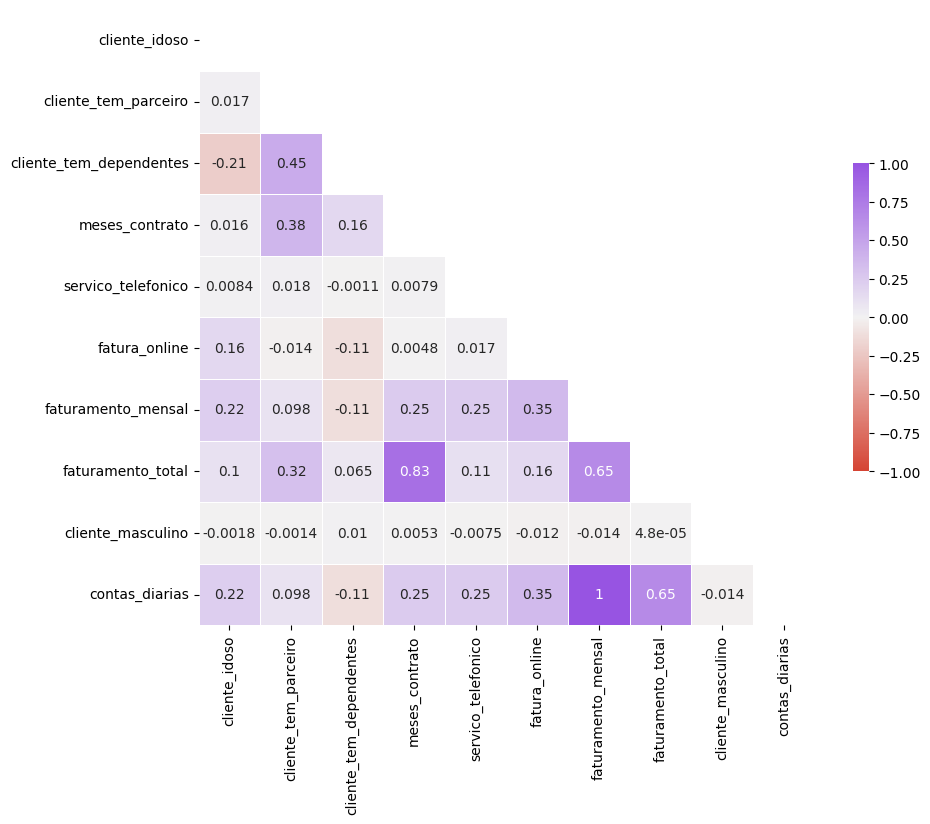

In [6]:
plot_correlacao(dados[dados.dtypes[dados.dtypes != object].index.tolist()[1:]].corr());

As maiores correlações são geradas pelas variaveis contas_diarias e faturamento total. Como contas_diarias foi calculada diretamente do Faturamento Mensal ambas trazem as mesma informação, decidimos remover contas_diarias. Enquanto a faturamento_total ela tem uma correlação muito alta com meses_contrato e faturamento_mensal. Omitiremos faturamento_total da modelagem para evitar problemas de multicolinearidade.

In [7]:
dados.drop(['contas_diarias','faturamento_total'],axis=1,inplace=True)

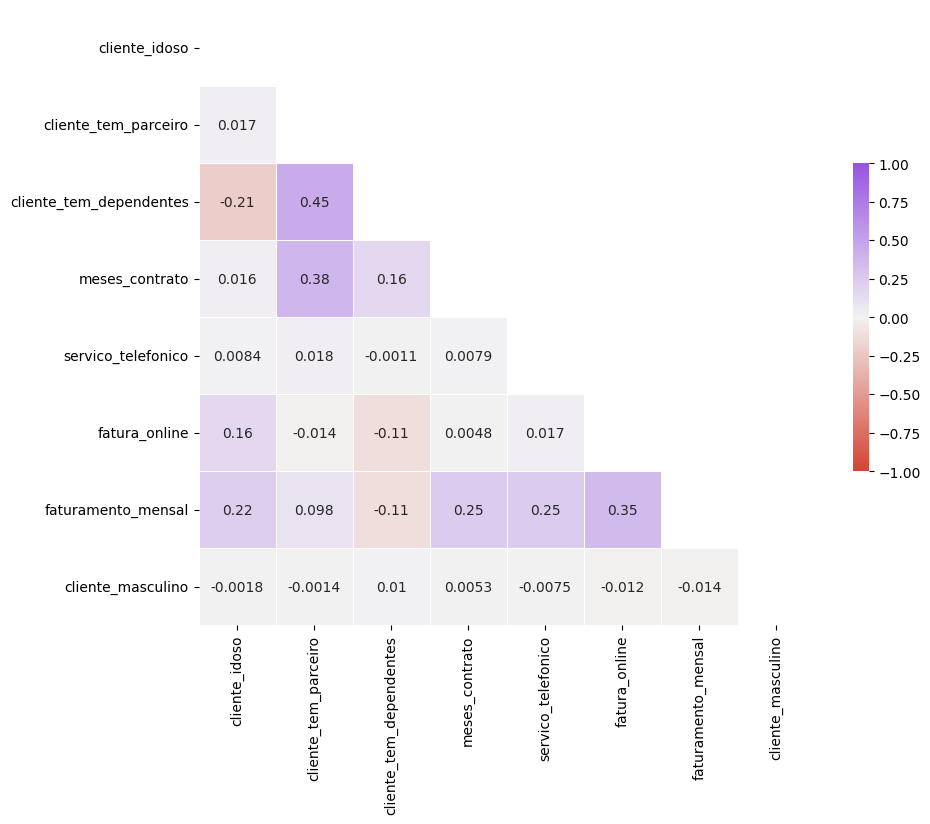

In [8]:
plot_correlacao(
    dados[dados.dtypes[dados.dtypes != object].index.tolist()[1:]].corr()
);

# Análises direcionadas
A seguir alguns graficos para observar a distribuição das variáves numéricas nas categorias de Churn de Clientes.

## Churn vs Faturamento Mensal

In [9]:
plot_churn_por_variavel(dados,'faturamento_mensal')

Os Clientes que deram Churn tinham um faturamento mensal maior comparado com os Clientes que permanecem. A distribuição do faturamento mensal de clientes que permanecem tem uma variabilidad maior.

## Churn vs Meses de Contrato

In [10]:
plot_churn_por_variavel(dados,'meses_contrato')

Podemos ver que clientes que deram Churn apresentam um Tempo de Contrato menor comparado com os Clientes que permanecem. O 75% dos clientes que permanecem tem antiguedade maior a 15 meses. Enquanto 75% dos clientes que deram Churn tem um Tempo de Contrato inferior a 30 meses.

# Preparação dos Dados

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    7032 non-null   bool   
 1   cliente_idoso            7032 non-null   bool   
 2   cliente_tem_parceiro     7032 non-null   bool   
 3   cliente_tem_dependentes  7032 non-null   bool   
 4   meses_contrato           7032 non-null   int64  
 5   servico_telefonico       7032 non-null   bool   
 6   multiplas_linhas         7032 non-null   object 
 7   assinatura_internet      7032 non-null   object 
 8   seguranca_online         7032 non-null   object 
 9   backup_online            7032 non-null   object 
 10  protecao_dispositivo     7032 non-null   object 
 11  suporte_tecnico          7032 non-null   object 
 12  tv_a_cabo                7032 non-null   object 
 13  streaming_filmes         7032 non-null   object 
 14  contrato                

## Encoding
Variáveis categóricas que em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Nesta parte do desafio, informaremos quais são as variáveis explicativas e qual é a variável alvo e transformaremos as variáveis categóricas para formato numérico usando o OneHotEncoder, utilizando o parâmetro drop='if_binary' caso alguma variável tenha apenas 2 categorias.

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [13]:
y = dados['churn']
X = dados.drop(['churn'],axis=1)

In [14]:
# Variaveis categóricas
variaveis_nao_numericas = X.columns[(X.dtypes == object)|(X.dtypes == 'bool')].to_list()
variaveis_nao_numericas

['cliente_idoso',
 'cliente_tem_parceiro',
 'cliente_tem_dependentes',
 'servico_telefonico',
 'multiplas_linhas',
 'assinatura_internet',
 'seguranca_online',
 'backup_online',
 'protecao_dispositivo',
 'suporte_tecnico',
 'tv_a_cabo',
 'streaming_filmes',
 'contrato',
 'fatura_online',
 'forma_pagamento',
 'cliente_masculino']

In [15]:
colunas = X.columns
one_hot = make_column_transformer(
    (
        OneHotEncoder(drop='if_binary')
        ,variaveis_nao_numericas
    )
  ,remainder='passthrough'
  ,sparse_threshold=0
)

In [16]:
x=one_hot.fit_transform(X)
x = pd.DataFrame(x,columns=one_hot.get_feature_names_out(colunas))
x.head()

,onehotencoder__cliente_idoso_True,onehotencoder__cliente_tem_parceiro_True,onehotencoder__cliente_tem_dependentes_True,onehotencoder__servico_telefonico_True,onehotencoder__multiplas_linhas_Não,onehotencoder__multiplas_linhas_Sem serviço telefónico,onehotencoder__multiplas_linhas_Sim,onehotencoder__assinatura_internet_DSL,onehotencoder__assinatura_internet_Fibra Ótica,onehotencoder__assinatura_internet_Não,...,onehotencoder__contrato_Dois anos,onehotencoder__contrato_Mensal,onehotencoder__fatura_online_True,onehotencoder__forma_pagamento_Cartão de crédito,onehotencoder__forma_pagamento_Cheque,onehotencoder__forma_pagamento_Cheque eletrônico,onehotencoder__forma_pagamento_Transferência bancária,onehotencoder__cliente_masculino_True,remainder__meses_contrato,remainder__faturamento_mensal
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,65.6
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,59.9
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,73.9
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.0
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,83.9


Transformamos também a variável alvo, usamos o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

## Verificação da proporção de Evasão (Churn)
Os dados mostram uma Evasão de 26,6%, existe desbalanceamento entre as classes no Churn, pelo que é possível que alguma tecnica de balanceamento seja necessaria a garantir que os modelos aprendam de forma eficaz a partir de ambas as classes, melhorando a precisão e a generalização.

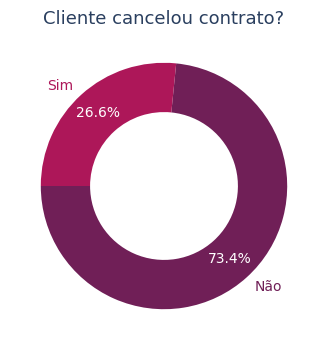

In [18]:
plot_rosca(dados,'churn');

## Normalização dos dados
Decidimos normalizar os dados devido a que modelos baseados em distância, como KNN, SVM, Regressão Logística e Redes Neurais, requerem esse pré-processamento. Além disso, modelos baseados em árvore, como Decision Tree, Random Forest e XGBoost, não são sensíveis à escala dos dados.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()
x_normalizado = scaler_min_max.fit_transform(x)
x_normalizado = pd.DataFrame(x_normalizado,columns=x.columns)
x_normalizado.head()

,onehotencoder__cliente_idoso_True,onehotencoder__cliente_tem_parceiro_True,onehotencoder__cliente_tem_dependentes_True,onehotencoder__servico_telefonico_True,onehotencoder__multiplas_linhas_Não,onehotencoder__multiplas_linhas_Sem serviço telefónico,onehotencoder__multiplas_linhas_Sim,onehotencoder__assinatura_internet_DSL,onehotencoder__assinatura_internet_Fibra Ótica,onehotencoder__assinatura_internet_Não,...,onehotencoder__contrato_Dois anos,onehotencoder__contrato_Mensal,onehotencoder__fatura_online_True,onehotencoder__forma_pagamento_Cartão de crédito,onehotencoder__forma_pagamento_Cheque,onehotencoder__forma_pagamento_Cheque eletrônico,onehotencoder__forma_pagamento_Transferência bancária,onehotencoder__cliente_masculino_True,remainder__meses_contrato,remainder__faturamento_mensal
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.112676,0.471144
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.112676,0.414428
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.042254,0.553731
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.169014,0.793532
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.028169,0.653234


## Balanceamento dos dados
Exploraremos diversos cenarios, entre eles os que derivam de usar os dados sem balancear, dados balanceados com oversampling e dados balanceados com subsampling.

Nota: O passo de subsampling/oversampling será feito dentro da pipeline junto com o treinamento do modelo.

In [20]:
from imblearn.pipeline import Pipeline as imbpipeline

## Oversampling
Usaremos SMOTE Oversampling. Ele permite o aumento da amostragem de classes minoritárias, sintetizando novos exemplos a partir dos existentes. A técnica é particularmente útil em cenários onde a classe minoritária é crucial para as previsões do modelo, como no nosso caso de Churn de Clientes.

In [21]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

## Undersampling
Usamos NearMiss, técnica de undersampling em duas etapas que seleciona amostras da classe majoritária próximas, mas com maior distância média aos vizinhos minoritários, visando equilibrar conjuntos de dados desbalanceados e reduzir sensibilidade a ruído. Selecionamos a versão 3 que é pensada para ser mais robusta a ruidos e outliers.

In [22]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version = 3)

# Modelagem

## Separação dos dados
Usaremos 75% dos dados para o treino e validação do modelo e reservaremos o 25% dos dados para o teste do modelo. Empregaremos validação cruzada com 5 grupos.

In [23]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, stratify = y, test_size = 0.25, random_state = 42)

## Treinamento de Modelos
Usaremos os seguintes modelos/algoritmos:
- DummyClassifier (modelo base)
- Regressão Logistica
- KNN
- Árvore de Decisão
- Floresta Aleatória

Para medir a performance dos modelos usaremos as seguintes métricas:
- Accuracy
- Precision
- Recall
- F1
- ROC AUC

Em paralelo usaremos o RandomizedSearchCV para encontrar os melhores parâmetros para os modelos. A literatura sugere que a Average Precision (AUC-PR) é a métrica mais adequada em problemas com forte desbalanceamento (como Churn) porque foca na performance das classes positivas. Nesse sentido, usaremos ela como métrica a ser otimizada para obter os melhores parâmetros dos modelos.

Para garantizar que a separação de dados é correta usaremos validação cruzada em todos os modelos. E a comparação de resultados entre treino e teste permitirá verificar a ausencia de Overfit.

In [24]:
precision = make_scorer(precision_score, zero_division=0)
recall = make_scorer(recall_score, zero_division=0)

scoring = {
  'auc_pr': 'average_precision' # Usaremos essa metrica na otimização de parametros
  ,'roc_auc': 'roc_auc'
  ,'f1': 'f1'
  ,'precision': precision
  ,'recall': recall
  ,'accuracy': 'accuracy'
}

### Modelo Base
Usaremos o Dummy Classifier para ter um ponto de partida. O Dummy Classifier é o modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possível.

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

model_dummy = DummyClassifier(strategy='most_frequent')
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

cv_resultados = cross_validate(model_dummy, x_treino, y_treino, cv = skf, scoring = scoring)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.265, 0.267)","(0.5, 0.5)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.733, 0.735)"


In [26]:
model_dummy.fit(x_treino, y_treino)

DummyClassifier(strategy='most_frequent')

In [27]:
metricas(y_teste = y_teste, y_previsto = model_dummy.predict(x_teste))

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.265643,0.5,0.0,0.0,0.0,0.734357


Usaremos os resultados acima como ponto de partida para os modelos que desenvolveremos.

### Árvore de Classificação

#### Sem balanceamento

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

modelo_arvore = DecisionTreeClassifier(random_state=42)

# Otimizando os parâmetros da função
grade_parametros = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search = RandomizedSearchCV(
    estimator = modelo_arvore
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5}

In [29]:
modelo_arvore_opt = DecisionTreeClassifier(random_state = 42, **random_search.best_params_)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(modelo_arvore_opt, x_treino, y_treino, cv = skf,scoring=scoring)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.551, 0.678)","(0.812, 0.854)","(0.509, 0.667)","(0.555, 0.686)","(0.439, 0.686)","(0.762, 0.822)"


In [30]:
modelo_arvore_opt.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [31]:
# Métricas para o treino
metricas(y_treino, modelo_arvore_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.495,0.751,0.632,0.622,0.643,0.801


In [32]:
# Métricas para o teste
metricas(y_teste, modelo_arvore_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.468,0.735,0.608,0.585,0.632,0.783


Observamos baixa variabilidade nos resultados na validação cruzada e os intervalos de confiançã das métricas cobrem os valores obtidos no teste. O que evidencia consistencia de resultados e ausencia de overfit no modelo.

#### Com Oversampling

In [33]:
from scipy.stats import randint

pipeline_arvore_smote = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('arvore', DecisionTreeClassifier(random_state=42))
])

# Otimizando os parâmetros da função
grade_parametros = {
    'arvore__max_depth': randint(2, 20)
    ,'arvore__min_samples_split': randint(2, 10)
    ,'arvore__min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(
    estimator = pipeline_arvore_smote
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'arvore__max_depth': 5,
 'arvore__min_samples_leaf': 4,
 'arvore__min_samples_split': 9}

In [34]:
pipeline_arvore_smote_opt = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('arvore', DecisionTreeClassifier(random_state=42))
])
pipeline_arvore_smote_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_arvore_smote_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.526, 0.612)","(0.796, 0.836)","(0.576, 0.629)","(0.479, 0.556)","(0.684, 0.761)","(0.72, 0.773)"


In [35]:
pipeline_arvore_smote_opt.fit(x_treino, y_treino,)

Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('arvore',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=4,
                                        min_samples_split=9,
                                        random_state=42))])

In [36]:
# Métricas para o treino
metricas(y_treino, pipeline_arvore_smote_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.473,0.756,0.627,0.55,0.728,0.77


In [37]:
# Métricas para o teste
metricas(y_teste, pipeline_arvore_smote_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.456,0.747,0.613,0.524,0.737,0.753


#### Com Undersampling

In [38]:
pipeline_arvore_nearmiss = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('arvore', DecisionTreeClassifier(random_state=42))
])

# Otimizando os parâmetros da função
grade_parametros = {
    'arvore__max_depth': randint(2, 20)
    ,'arvore__min_samples_split': randint(2, 10)
    ,'arvore__min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(
    estimator = pipeline_arvore_nearmiss
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'arvore__max_depth': 4,
 'arvore__min_samples_leaf': 2,
 'arvore__min_samples_split': 6}

In [39]:
pipeline_arvore_nearmiss_opt = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('arvore', DecisionTreeClassifier(random_state=42))
])
pipeline_arvore_nearmiss_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_arvore_nearmiss_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.512, 0.601)","(0.747, 0.814)","(0.536, 0.63)","(0.455, 0.577)","(0.56, 0.788)","(0.706, 0.781)"


In [40]:
pipeline_arvore_nearmiss_opt.fit(x_treino, y_treino)

Pipeline(steps=[('undersample', NearMiss(version=3)),
                ('arvore',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=2,
                                        min_samples_split=6,
                                        random_state=42))])

In [41]:
# Métricas para o treino
metricas(y_treino, pipeline_arvore_nearmiss_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.46,0.74,0.609,0.55,0.681,0.767


In [42]:
# Métricas para o teste
metricas(y_teste, pipeline_arvore_nearmiss_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.452,0.734,0.601,0.544,0.67,0.763


### Classificador de K Vizinhos (KNeighbors)

#### Sem balanceamento

In [45]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()

# Otimizando os parâmetros da função
grade_parametros = {
    'n_neighbors': randint(3, 30),            # número de vizinhos
    'weights': ['uniform', 'distance'],       # ponderação dos vizinhos
    'p': randint(1, 3),                       # métrica Minkowski (1 = Manhattan, 2 = Euclidiana)
}

random_search = RandomizedSearchCV(
    estimator = modelo_knn
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}

In [46]:
modelo_knn_opt = KNeighborsClassifier(**random_search.best_params_)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

cv_resultados = cross_validate(modelo_knn_opt, x_treino, y_treino, cv = skf,scoring=scoring)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.543, 0.612)","(0.805, 0.837)","(0.554, 0.602)","(0.565, 0.616)","(0.522, 0.612)","(0.769, 0.791)"


In [47]:
modelo_knn_opt.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=29, p=1)

In [48]:
# Métricas para o treino
metricas(y_treino, modelo_knn_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.486,0.738,0.617,0.63,0.605,0.8


In [49]:
# Métricas para o teste
metricas(y_teste, modelo_knn_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.444,0.712,0.576,0.574,0.578,0.774


#### Com Oversampling

In [50]:
pipeline_knn_smote = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('knn', KNeighborsClassifier())
])

# Otimizando os parâmetros da função
grade_parametros = {
    'knn__n_neighbors': randint(3, 30),            # número de vizinhos
    'knn__weights': ['uniform', 'distance'],       # ponderação dos vizinhos
    'knn__p': randint(1, 3),                       # métrica Minkowski (1 = Manhattan, 2 = Euclidiana)
}

random_search = RandomizedSearchCV(
    estimator = pipeline_knn_smote
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'knn__n_neighbors': 29, 'knn__p': 1, 'knn__weights': 'uniform'}

In [51]:
pipeline_knn_smote_opt = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('knn', KNeighborsClassifier())
])
pipeline_knn_smote_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_knn_smote_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.529, 0.597)","(0.8, 0.832)","(0.585, 0.611)","(0.463, 0.487)","(0.778, 0.837)","(0.7, 0.723)"


In [52]:
pipeline_knn_smote_opt.fit(x_treino, y_treino)

Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=29, p=1))])

In [53]:
# Métricas para o treino
metricas(y_treino, pipeline_knn_smote_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.473,0.778,0.637,0.507,0.856,0.741


In [54]:
# Métricas para o teste
metricas(y_teste, pipeline_arvore_smote_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.456,0.747,0.613,0.524,0.737,0.753


#### Com Undersampling

In [55]:
pipeline_knn_nearmiss = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('knn', KNeighborsClassifier())
])

# Otimizando os parâmetros da função
grade_parametros = {
    'knn__n_neighbors': randint(3, 30),            # número de vizinhos
    'knn__weights': ['uniform', 'distance'],       # ponderação dos vizinhos
    'knn__p': randint(1, 3),                       # métrica Minkowski (1 = Manhattan, 2 = Euclidiana)
}

random_search = RandomizedSearchCV(
    estimator = pipeline_knn_nearmiss
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'knn__n_neighbors': 29, 'knn__p': 1, 'knn__weights': 'uniform'}

In [56]:
pipeline_knn_nearmiss_opt = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('knn', KNeighborsClassifier())
])
pipeline_knn_nearmiss_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_knn_nearmiss_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.407, 0.538)","(0.729, 0.785)","(0.524, 0.585)","(0.43, 0.478)","(0.66, 0.765)","(0.675, 0.717)"


In [57]:
pipeline_knn_nearmiss_opt.fit(x_treino, y_treino)

Pipeline(steps=[('undersample', NearMiss(version=3)),
                ('knn', KNeighborsClassifier(n_neighbors=29, p=1))])

In [58]:
# Métricas para o treino
metricas(y_treino, pipeline_knn_nearmiss_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.419,0.719,0.576,0.477,0.727,0.716


In [60]:
# Métricas para o teste
metricas(y_teste, pipeline_knn_nearmiss_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.403,0.707,0.56,0.454,0.732,0.695


### Regressão Logística

#### Sem balanceamento

In [63]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
import warnings

modelo_rl = LogisticRegression(random_state=42)

# Otimizando os parâmetros da função
grade_parametros = {
    'C': uniform(loc=0.01, scale=10)        # Regularização L2 (C inverso à regularização)
    ,'penalty': ['l1', 'l2', 'elasticnet']  # Tipo de penalização
    ,'l1_ratio': uniform(0, 1)              # Proporção do termo L1 para elasticnet (ignorado se não usar elasticnet)
    ,'fit_intercept': [True, False]         # Ajustar intercepto ou não
}

with warnings.catch_warnings():
  warnings.simplefilter("ignore", DeprecationWarning)
  random_search = RandomizedSearchCV(
      estimator = modelo_rl
      ,param_distributions=grade_parametros
      ,n_iter=20
      ,cv=5
      ,scoring=scoring
      ,verbose=0
      ,random_state=42
      ,refit='auc_pr'
  )
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'C': np.float64(9.666320330745593),
 'fit_intercept': False,
 'l1_ratio': np.float64(0.3854165025399161),
 'penalty': 'l2'}

In [64]:
modelo_rl_opt = LogisticRegression(random_state=42, **random_search.best_params_)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

cv_resultados = cross_validate(modelo_rl_opt, x_treino, y_treino, cv = skf,scoring=scoring)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.593, 0.702)","(0.822, 0.863)","(0.556, 0.626)","(0.628, 0.674)","(0.489, 0.594)","(0.79, 0.812)"


In [65]:
modelo_rl_opt.fit(x_treino, y_treino)

LogisticRegression(C=np.float64(9.666320330745593), fit_intercept=False,
                   l1_ratio=np.float64(0.3854165025399161), random_state=42)

In [66]:
# Métricas para o treino
metricas(y_treino, modelo_rl_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.482,0.722,0.598,0.662,0.546,0.805


In [67]:
# Métricas para o teste
metricas(y_teste, modelo_rl_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.465,0.712,0.581,0.641,0.531,0.796


#### Com Oversampling

In [68]:
pipeline_rl_smote = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('rl', LogisticRegression(random_state=42))
])

# Otimizando os parâmetros da função
grade_parametros = {
    'rl__C': uniform(loc=0.01, scale=10),               # Regularização L2 (C inverso à regularização)
    'rl__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Tipo de penalização
    'rl__l1_ratio': uniform(0, 1),                      # Proporção do termo L1 para elasticnet (ignorado se não usar elasticnet)
    'rl__fit_intercept': [True, False],                 # Ajustar intercepto ou não
    'rl__class_weight': [None, 'balanced'],             # Peso das classes para desbalanceamento
}

random_search = RandomizedSearchCV(
    estimator = pipeline_rl_smote
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'rl__C': np.float64(4.514992519695429),
 'rl__class_weight': 'balanced',
 'rl__fit_intercept': False,
 'rl__l1_ratio': np.float64(0.9422017556848528),
 'rl__penalty': 'l2'}

In [69]:
pipeline_rl_smote_opt = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('rl', LogisticRegression(random_state=42))
])
pipeline_rl_smote_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_rl_smote_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.589, 0.706)","(0.818, 0.864)","(0.591, 0.657)","(0.501, 0.55)","(0.704, 0.834)","(0.735, 0.772)"


In [70]:
pipeline_rl_smote_opt.fit(x_treino, y_treino)

Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('rl',
                 LogisticRegression(C=np.float64(4.514992519695429),
                                    class_weight='balanced',
                                    fit_intercept=False,
                                    l1_ratio=np.float64(0.9422017556848528),
                                    random_state=42))])

In [71]:
# Métricas para o treino
metricas(y_treino, pipeline_rl_smote_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.476,0.769,0.636,0.532,0.79,0.76


In [72]:
# Métricas para o teste
metricas(y_teste, pipeline_rl_smote_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.461,0.758,0.621,0.515,0.784,0.746


#### Com Undersampling

In [74]:
pipeline_rl_nearmiss = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('rl', LogisticRegression(random_state=42))
])

# Otimizando os parâmetros da função
grade_parametros = {
    'rl__C': uniform(loc=0.01, scale=10),               # Regularização L2 (C inverso à regularização)
    'rl__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Tipo de penalização
    'rl__l1_ratio': uniform(0, 1),                      # Proporção do termo L1 para elasticnet (ignorado se não usar elasticnet)
    'rl__fit_intercept': [True, False],                 # Ajustar intercepto ou não
    'rl__class_weight': [None, 'balanced'],             # Peso das classes para desbalanceamento
}

random_search = RandomizedSearchCV(
    estimator = pipeline_rl_nearmiss
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'rl__C': np.float64(0.5741157902710026),
 'rl__class_weight': 'balanced',
 'rl__fit_intercept': False,
 'rl__l1_ratio': np.float64(0.9385527090157502),
 'rl__penalty': 'l2'}

In [76]:
pipeline_rl_nearmiss_opt = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('rl', LogisticRegression(random_state=42))
])
pipeline_rl_nearmiss_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_rl_nearmiss_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.575, 0.681)","(0.795, 0.846)","(0.572, 0.641)","(0.514, 0.587)","(0.614, 0.741)","(0.745, 0.789)"


In [77]:
pipeline_rl_nearmiss_opt.fit(x_treino, y_treino)

Pipeline(steps=[('undersample', NearMiss(version=3)),
                ('rl',
                 LogisticRegression(C=np.float64(0.5741157902710026),
                                    class_weight='balanced',
                                    fit_intercept=False,
                                    l1_ratio=np.float64(0.9385527090157502),
                                    random_state=42))])

In [78]:
# Métricas para o treino
metricas(y_treino, pipeline_rl_nearmiss_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.479,0.751,0.626,0.578,0.683,0.783


In [79]:
# Métricas para o teste
metricas(y_teste, pipeline_rl_nearmiss_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.47,0.745,0.617,0.569,0.675,0.778


### Floresta Aleatória

#### Sem balanceamento

In [80]:
from sklearn.ensemble import RandomForestClassifier

modelo_floresta = RandomForestClassifier(random_state=42)

# Otimizando os parâmetros da função
grade_parametros = {
    'n_estimators': randint(50, 200)
    ,'max_depth': randint(3, 20)
    ,'min_samples_split': randint(2, 10)
    ,'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(
    estimator = modelo_floresta
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 183}

In [81]:
modelo_floresta_opt = RandomForestClassifier(random_state=42,**random_search.best_params_)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(modelo_floresta_opt, x_treino, y_treino, cv = skf,scoring=scoring)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.594, 0.706)","(0.821, 0.862)","(0.527, 0.627)","(0.612, 0.71)","(0.443, 0.582)","(0.782, 0.819)"


In [82]:
modelo_floresta_opt.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=3,
                       n_estimators=183, random_state=42)

In [83]:
# Métricas para o treino
metricas(y_treino, modelo_floresta_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.559,0.768,0.671,0.746,0.611,0.841


In [84]:
# Métricas para o teste
metricas(y_teste, modelo_floresta_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.454,0.7,0.562,0.641,0.501,0.793


Neste modelo observamos diferença significativa entre os resultados do treino e o teste. Devemos ter cuidado com Overfit do modelo.

#### Com Oversampling

In [85]:
pipeline_floresta_smote = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('floresta', RandomForestClassifier(random_state=42))
])

# Otimizando os parâmetros da função
grade_parametros = {
    'floresta__n_estimators': randint(50, 200)      # número de árvores na floresta
    ,'floresta__max_depth': randint(3, 20)          # profundidade máxima da árvore
    ,'floresta__min_samples_split': randint(2, 10)  # min samples para dividir nó
    ,'floresta__min_samples_leaf': randint(1, 10)   # min amostras por folha
    ,'floresta__bootstrap': [True, False]           # usar amostragem bootstrap ou não
}

random_search = RandomizedSearchCV(
    estimator = pipeline_floresta_smote
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'floresta__bootstrap': True,
 'floresta__max_depth': 11,
 'floresta__min_samples_leaf': 7,
 'floresta__min_samples_split': 3,
 'floresta__n_estimators': 181}

In [86]:
pipeline_floresta_smote_opt = imbpipeline([
    ('oversample', SMOTE(random_state=42))
    ,('floresta', RandomForestClassifier(random_state=42))
])
pipeline_floresta_smote_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_floresta_smote_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.58, 0.7)","(0.818, 0.862)","(0.594, 0.675)","(0.542, 0.614)","(0.644, 0.764)","(0.762, 0.807)"


In [87]:
pipeline_floresta_smote_opt.fit(x_treino, y_treino)

Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('floresta',
                 RandomForestClassifier(max_depth=11, min_samples_leaf=7,
                                        min_samples_split=3, n_estimators=181,
                                        random_state=42))])

In [88]:
# Métricas para o treino
metricas(y_treino, pipeline_floresta_smote_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.554,0.812,0.702,0.628,0.794,0.82


In [89]:
# Métricas para o teste
metricas(y_teste, pipeline_floresta_smote_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.475,0.759,0.629,0.55,0.737,0.77


#### Com Undersampling

In [90]:
pipeline_floresta_nearmiss = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('floresta', RandomForestClassifier(random_state=42))
])

# Otimizando os parâmetros da função
grade_parametros = {
    'floresta__n_estimators': randint(50, 200)      # número de árvores na floresta
    ,'floresta__max_depth': randint(3, 20)          # profundidade máxima da árvore
    ,'floresta__min_samples_split': randint(2, 10)  # min samples para dividir nó
    ,'floresta__min_samples_leaf': randint(1, 10)   # min amostras por folha
    ,'floresta__bootstrap': [True, False]           # usar amostragem bootstrap ou não
}

random_search = RandomizedSearchCV(
    estimator = pipeline_floresta_nearmiss
    ,param_distributions=grade_parametros
    ,n_iter=20
    ,cv=5
    ,scoring=scoring
    ,verbose=0
    ,random_state=42
    ,refit='auc_pr'
)
random_search.fit(x_treino, y_treino)
random_search.best_params_

{'floresta__bootstrap': False,
 'floresta__max_depth': 5,
 'floresta__min_samples_leaf': 5,
 'floresta__min_samples_split': 4,
 'floresta__n_estimators': 184}

In [91]:
pipeline_floresta_nearmiss_opt = imbpipeline([
    ('undersample', NearMiss(version = 3))
    ,('floresta', RandomForestClassifier(random_state=42))
])
pipeline_floresta_nearmiss_opt.set_params(**random_search.best_params_)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(
    pipeline_floresta_nearmiss_opt
    ,x_treino
    ,y_treino
    ,cv = skf
    ,scoring = scoring
)
intervalo_conf(cv_resultados)

,IC_test_auc_pr,IC_test_roc_auc,IC_test_f1,IC_test_precision,IC_test_recall,IC_test_accuracy
0,"(0.572, 0.693)","(0.801, 0.851)","(0.567, 0.657)","(0.522, 0.602)","(0.596, 0.748)","(0.748, 0.798)"


In [92]:
pipeline_floresta_nearmiss_opt.fit(x_treino, y_treino)

Pipeline(steps=[('undersample', NearMiss(version=3)),
                ('floresta',
                 RandomForestClassifier(bootstrap=False, max_depth=5,
                                        min_samples_leaf=5, min_samples_split=4,
                                        n_estimators=184, random_state=42))])

In [93]:
# Métricas para o treino
metricas(y_treino, pipeline_floresta_nearmiss_opt.predict(x_treino)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.492,0.758,0.637,0.597,0.683,0.793


In [94]:
# Métricas para o teste
metricas(y_teste, pipeline_floresta_nearmiss_opt.predict(x_teste)).round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
0,0.464,0.74,0.611,0.563,0.668,0.774


## Comparação de Modelos e Seleção

In [95]:
modelos = {
    'Modelo Base': model_dummy
    ,'Árvore de Classificação': modelo_arvore_opt
    ,'Árvore de Classificação com Oversampling': pipeline_arvore_smote_opt
    ,'Árvore de Classificação com Undersampling': pipeline_arvore_nearmiss_opt
    ,'KNN': modelo_knn_opt
    ,'KNN com Oversampling': pipeline_knn_smote_opt
    ,'KNN com Undersampling': pipeline_knn_nearmiss_opt
    ,'Regressão Logística': modelo_rl_opt
    ,'Regressão Logística com Oversampling': pipeline_rl_smote_opt
    ,'Regressão Logística com Undersampling': pipeline_rl_nearmiss_opt
    ,'Floresta Aleatória': modelo_floresta_opt
    ,'Floresta Aleatória com Oversampling': pipeline_floresta_smote_opt
    ,'Floresta Aleatória com Undersampling': pipeline_floresta_nearmiss_opt
}

In [153]:
resultados = pd.DataFrame(columns=metricas(y_teste, model_dummy.predict(x_teste)).columns)
for nome, modelo in modelos.items():
    resultados.loc[nome] = metricas(y_teste, modelo.predict(x_teste)).iloc[0]

In [155]:
resultados.loc[resultados.index.str.contains('Árvore', na=False)].round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
Árvore de Classificação,0.468,0.735,0.608,0.585,0.632,0.783
Árvore de Classificação com Oversampling,0.456,0.747,0.613,0.524,0.737,0.753
Árvore de Classificação com Undersampling,0.452,0.734,0.601,0.544,0.670,0.763


Entre os modelos de Àrvore de Classificação o modelo sem balanceamento apresenta o maior valor de auc_pr, precision e accuracy, embora apresente um menor recall. As diferenças nos valores de f1 e roc_auc são pequenas.

In [156]:
resultados.loc[resultados.index.str.contains('KNN', na=False)].round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
KNN,0.444,0.712,0.576,0.574,0.578,0.774
KNN com Oversampling,0.426,0.734,0.589,0.466,0.801,0.703
KNN com Undersampling,0.403,0.707,0.560,0.454,0.732,0.695


Entre os modelos KNN o modelo sem balanceamento apresenta o maior valor de auc_pr, precision e accuracy, embora apresente um menor recall. As diferenças nos valores de f1 e roc_auc são pequenas.

In [162]:
resultados.loc[resultados.index.str.contains('Logística', na=False)].round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
Regressão Logística,0.465,0.712,0.581,0.641,0.531,0.796
Regressão Logística com Oversampling,0.461,0.758,0.621,0.515,0.784,0.746
Regressão Logística com Undersampling,0.470,0.745,0.617,0.569,0.675,0.778


Entre os modelos de regressão logística o modelo com Undersampling apresenta o maior valor de auc_pr, e apresenta valores equilibrados nas outras métricas.

In [163]:
resultados.loc[resultados.index.str.contains('Floresta', na=False)].round(3)

,auc_pr,roc_auc,f1,precision,recall,accuracy
Floresta Aleatória,0.454,0.700,0.562,0.641,0.501,0.793
Floresta Aleatória com Oversampling,0.475,0.759,0.629,0.550,0.737,0.770
Floresta Aleatória com Undersampling,0.464,0.740,0.611,0.563,0.668,0.774


Nos modelos de Floresta Aleatória o modelo com Oversampling apresenta o maior valor de auc_pr, roc_auc f1 e recall.

In [174]:
modelos_selecionados = [
    'Árvore de Classificação'
    ,'KNN'
    ,'Regressão Logística com Undersampling'
    ,'Floresta Aleatória com Oversampling'
]
resultados.loc[modelos_selecionados]

,auc_pr,roc_auc,f1,precision,recall,accuracy
Árvore de Classificação,0.467579,0.734901,0.607621,0.585317,0.631692,0.783276
KNN,0.444193,0.711620,0.576307,0.574468,0.578158,0.774175
Regressão Logística com Undersampling,0.469988,0.744695,0.617042,0.568592,0.674518,0.777588
Floresta Aleatória com Oversampling,0.474752,0.759091,0.629460,0.549521,0.736617,0.769625


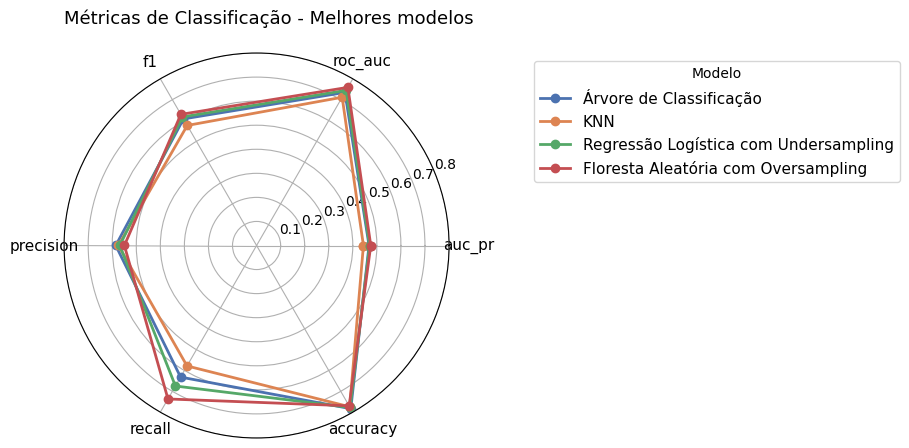

In [175]:
plot_radial(resultados.loc[modelos_selecionados], 'Métricas de Classificação - Modelos Selecionados');

Entre os modelos selecionados vemos que o modelo treinado com o ensemble de **Floresta Aleatória com Oversampling** apresenta os maiores valores de auc_pr, roc_auc, f1 e recall. Também apresenta o menor valor de precision.

A matriz de confusão para os dados de teste do modelo selecionado é a seguinte:

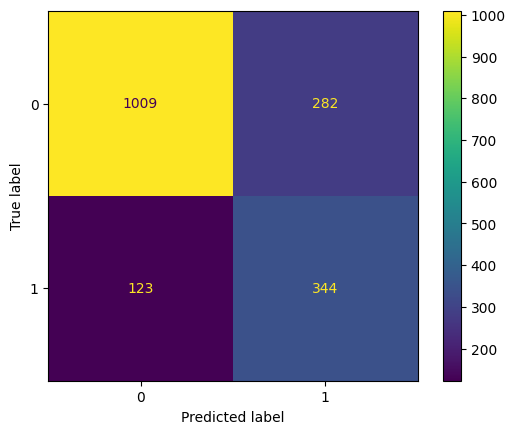

In [176]:
ConfusionMatrixDisplay.from_predictions(y_teste, pipeline_floresta_smote_opt.predict(x_teste));

# Interpretação e Conclusões

O modelo selecionado é o modelo treinado com o ensemble **Floresta Aleatória com Oversampling**. A seguir analisaremos a **Importância das Variáveis** a fim de determinar os principais fatores que caracterizam o Churn de Clientes.

## Importancia das Variáveis do Modelo

In [182]:
importancia = pd.DataFrame(
    pipeline_floresta_smote_opt.named_steps['floresta'].feature_importances_
    ,index=pipeline_floresta_smote_opt.named_steps['floresta'].feature_names_in_
)
importancia.columns = ['Importância']

In [213]:
importancia.shape

(39, 1)

In [214]:
importancia.sort_values('Importância', ascending=False).head(10)

,Importância
onehotencoder__contrato_Mensal,0.164837
remainder__meses_contrato,0.119297
onehotencoder__seguranca_online_Não,0.081530
onehotencoder__contrato_Dois anos,0.071365
onehotencoder__forma_pagamento_Cheque eletrônico,0.061199
onehotencoder__suporte_tecnico_Não,0.059189
remainder__faturamento_mensal,0.056516
onehotencoder__fatura_online_True,0.043266
onehotencoder__assinatura_internet_Fibra Ótica,0.041429
onehotencoder__contrato_Anual,0.029470


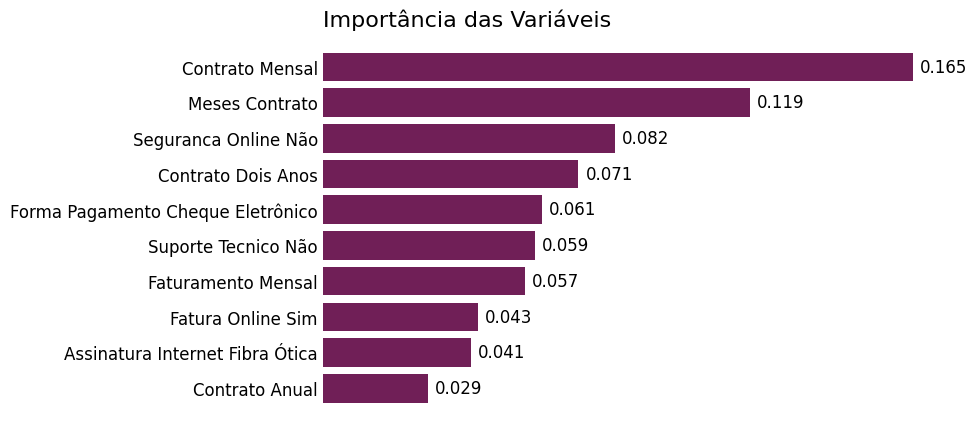

In [219]:
plot_importancia(importancia.sort_values('Importância', ascending=True).tail(10));

## Conclusão e Recomendações

Das 39 características do modelo (após encode) a figura acima exibe os 10 fatores principais que influenciam o Churn de Clientes.

Sugerimos as seguintes estrategias de retenção com base nesses fatores.

- **Contrato Mensal, Anual ou de 2 Anos**: Churn de clientes tem maior incidencia em tipos de contrato mensal. Sugerimos incentivar Contratos anuais ou de 2 anos. Por exemplo, um desconto no plano de 2 anos.


In [224]:
plot_churn_por_variavel(dados, 'contrato')

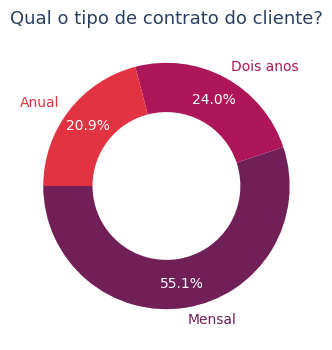

In [226]:
plot_rosca(dados,'contrato');

- **Meses Contrato**: Observamos maior incidencia de Churn em clientes com menor antiguedade. Alguma estrategia de premiação a clientes ao atingir certa antiguedade pode funcionar para incentivar a permanência.


In [228]:
plot_churn_por_variavel(dados, 'meses_contrato')

- **Segurança Online Não e Suporte Tecnico Não**: Acreditamos que uma má experiencia com o serviço tem um grande impacto no Churn de Clientes. A maior incidencia no Churn de Clientes em Clientes que não assinaram os serviços de Seguranca Online e Suporte Técnico pode ser evidencia disso. Sugerimos investigar o motivo da não contratação desses serviços, maior educação sobre a importancia desses serviços, uma analise dos preços oferecidos ou uma reformulação dos serviços pode ser necessaria.


In [229]:
plot_churn_por_variavel(dados, 'seguranca_online')

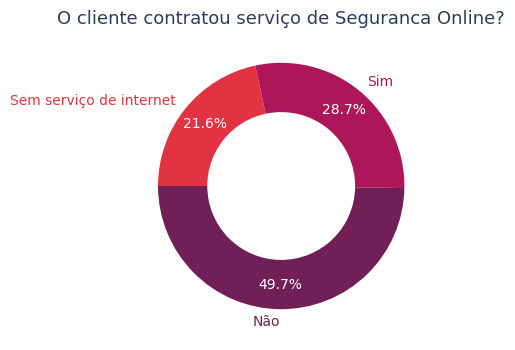

In [230]:
plot_rosca(dados,'seguranca_online');

In [231]:
plot_churn_por_variavel(dados, 'suporte_tecnico')

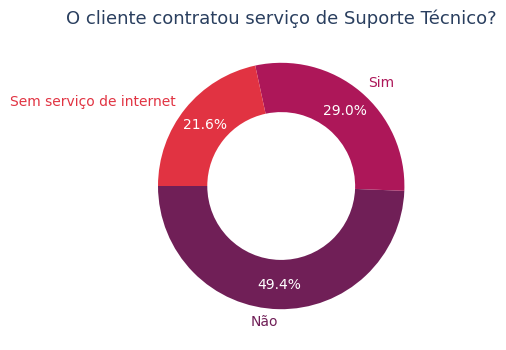

In [232]:
plot_rosca(dados,'suporte_tecnico');

- **Forma de Pagamento Cheque Eletrônico** Observou-se que Clientes que usam esse meio de pagamento apresentam uma maior incidencia de Churn. Sugerimos levantar os possíveis problemas que podem estar enfrentando os clientes que usam esse meio de pagamento.


In [233]:
plot_churn_por_variavel(dados, 'forma_pagamento')

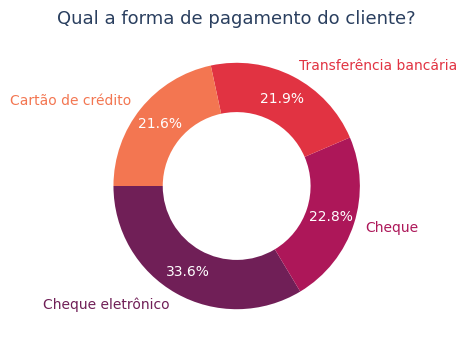

In [234]:
plot_rosca(dados,'forma_pagamento');

- **Faturamento Mensal** Observamos que tem uma maior incidencia de Churn em clientes com valores de faturamento mensal mais elevados.


In [235]:
plot_churn_por_variavel(dados, 'faturamento_mensal')

- **Fatura Online Sim** Aqui também pode se investigar um pouco os motivos pelos que Clientes que recevem suas faturas online apresentam maior Churn. Sera que eles não conseguiem acessar às suas faturas? Será que os Clientes estão insatisfeitos com o conteudo ou a forma da informação contida na fatura online? Ou será que o pago por esse serviço é desproporcionado?


In [236]:
plot_churn_por_variavel(dados, 'fatura_online')

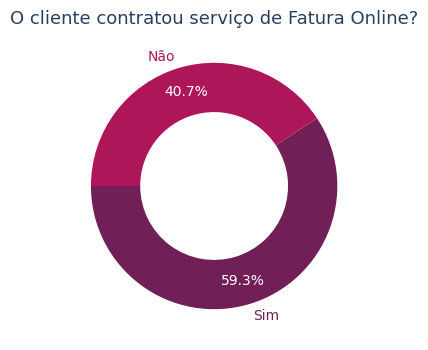

In [237]:
plot_rosca(dados,'fatura_online');

- **Assinatura Internet de Fibra Ótica** Observamos uma maior incidencia de Churn quando o tipo de internet é de Fibra Ótica. Recomendamos levantar os possíveis problemas que enfrentam os Clientes com este tipo de conexão. Será que o serviço proporcionado é inferior em qualidade ao esperado pelo cliente? Será que problemas de conexão são frequentes?, etc.

In [238]:
plot_churn_por_variavel(dados, 'assinatura_internet')

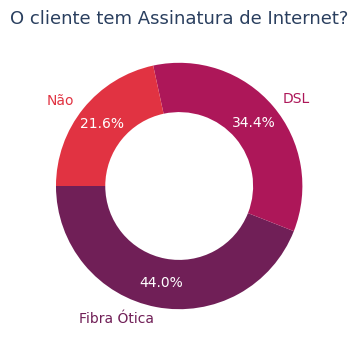

In [239]:
plot_rosca(dados,'assinatura_internet');